Compare the best-fit contours from both strategies of determining cluster membership, and with or without dwarfs.

In [1]:
import numpy as np

import pickle

import corner

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Final fit

In [2]:
# Covariance with dwarfs, CF4 membership
temp_infile = open('cov_ab_fuji_zero-point_ITFR_KAD.pickle', 'rb')
cov_ab_CF4 = pickle.load(temp_infile)
temp_infile.close()

# Covariance without dwarfs, CF4 membership
temp_infile = open('cov_ab_fuji_zero-point_ITFR_nodwarf2_KAD.pickle', 'rb')
cov_ab_CF4_nodwarf = pickle.load(temp_infile)
temp_infile.close()

# Covariance with dwarfs, Christoph's membership
temp_infile = open('cov_ab_fuji_zero-point-Christoph_ITFR.pickle', 'rb')
cov_ab_Christoph = pickle.load(temp_infile)
temp_infile.close()

# Covariance without dwarfs, Christoph's membership
temp_infile = open('cov_ab_fuji_zero-point-Christoph_ITFR_nodwarf4.pickle', 'rb')
cov_ab_Christoph_nodwarf = pickle.load(temp_infile)
temp_infile.close()

### Generate samples based on covariances

*(Updated 8/15/23)*

In [3]:
N_samples = 10000

rng = np.random.default_rng()

# CF4 membership with dwarfs
m_CF4, b_CF4 = rng.multivariate_normal([-7.46, -22.27], cov_ab_CF4, N_samples).T
samples_CF4 = np.stack((m_CF4, b_CF4))

# CF4 membership without dwarfs
m_CF4_nodwarf, b_CF4_nodwarf = rng.multivariate_normal([-7.57, -22.29], cov_ab_CF4_nodwarf, N_samples).T
samples_CF4_nodwarf = np.stack((m_CF4_nodwarf, b_CF4_nodwarf))

# Christoph's membership with dwarfs
m_Christoph, b_Christoph = rng.multivariate_normal([-7.64, -22.30], cov_ab_Christoph, N_samples).T
samples_Christoph = np.stack((m_Christoph, b_Christoph))

# Christoph's membership without dwarfs
m_Christoph_nodwarf, b_Christoph_nodwarf = rng.multivariate_normal([-8.24, -22.40], cov_ab_Christoph_nodwarf, N_samples).T
samples_Christoph_nodwarf = np.stack((m_Christoph_nodwarf, b_Christoph_nodwarf))

## Corner plots

### Including dwarfs, comparing membership criteria

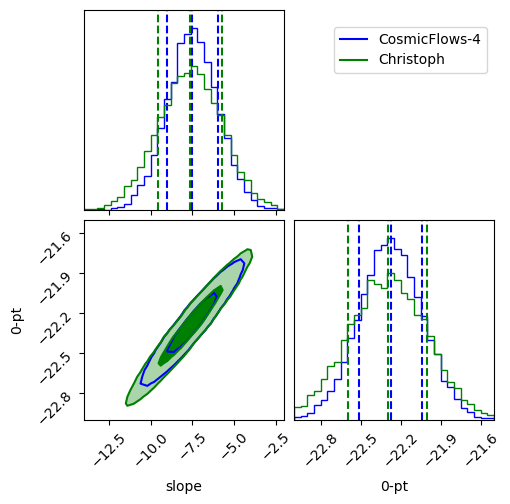

In [7]:
corner_kwargs = dict(bins=30, 
                     smooth=1,
                     range=[[-14, -2], [-23, -21.5]],   # Range for slope, 0-pt. Adjust as needed.
                     labels=['slope', '0-pt'],
                     levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                     quantiles=[0.16, 0.5, 0.84],
                     #color='blue',
                     #hist_kwargs={'histtype':'step', 'alpha':1, 'lw':2},
                     plot_datapoints=False,
                     fill_contours=True,
                     #show_titles=True,
                     title = {'including dwarfs'},
                     title_kwargs={"fontsize": 14})

fig = corner.corner(samples_CF4.T, color='blue', **corner_kwargs)

corner.corner(samples_Christoph.T, fig=fig, color='green', **corner_kwargs)

plt.legend(handles=[mlines.Line2D([], [], color=c, label=l) for c,l in zip(['blue', 'green'],['CosmicFlows-4', 'Christoph'])], 
           bbox_to_anchor=(1,2),
           loc='upper right');

### Excluding dwarfs, comparing membership criteria

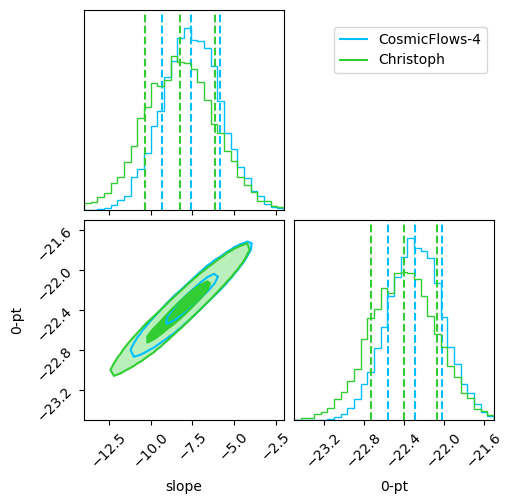

In [10]:
corner_kwargs = dict(bins=30, 
                     smooth=1,
                     range=[[-14, -2], [-23.5, -21.5]],   # Range for slope, 0-pt. Adjust as needed.
                     labels=['slope', '0-pt'],
                     levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                     quantiles=[0.16, 0.5, 0.84],
                     #color='blue',
                     #hist_kwargs={'histtype':'step', 'alpha':1, 'lw':2},
                     plot_datapoints=False,
                     fill_contours=True,
                     #show_titles=True,
                     title = {'including dwarfs'},
                     title_kwargs={"fontsize": 14})

fig = corner.corner(samples_CF4_nodwarf.T, color='deepskyblue', **corner_kwargs)

corner.corner(samples_Christoph_nodwarf.T, fig=fig, color='limegreen', **corner_kwargs)

plt.legend(handles=[mlines.Line2D([], [], color=c, label=l) for c,l in zip(['deepskyblue', 'limegreen'],['CosmicFlows-4', 'Christoph'])], 
           bbox_to_anchor=(1,2),
           loc='upper right');

### With and without dwarfs, CF4

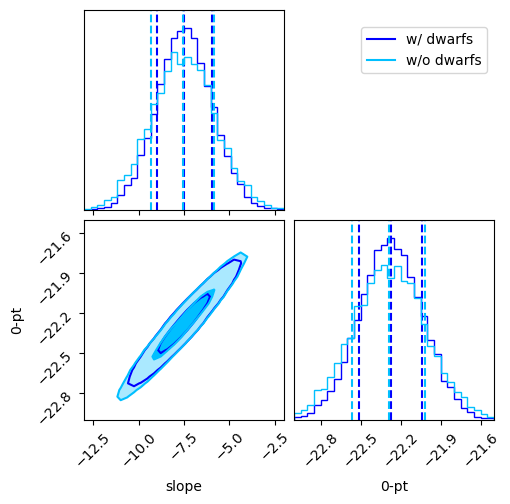

In [12]:
corner_kwargs = dict(bins=30, 
                     smooth=1,
                     range=[[-13, -2], [-23, -21.5]],   # Range for slope, 0-pt. Adjust as needed.
                     labels=['slope', '0-pt'],
                     levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                     quantiles=[0.16, 0.5, 0.84],
                     #color='blue',
                     #hist_kwargs={'histtype':'step', 'alpha':1, 'lw':2},
                     plot_datapoints=False,
                     fill_contours=True,
                     #show_titles=True,
                     title = {'Cosmicflows-4'},
                     title_kwargs={"fontsize": 14})

fig = corner.corner(samples_CF4.T, color='blue', **corner_kwargs)

corner.corner(samples_CF4_nodwarf.T, fig=fig, color='deepskyblue', **corner_kwargs)

plt.legend(handles=[mlines.Line2D([], [], color=c, label=l) for c,l in zip(['blue', 'deepskyblue'],['w/ dwarfs', 'w/o dwarfs'])], 
           bbox_to_anchor=(1,2),
           loc='upper right');

### With and without dwarfs, Christoph's membership

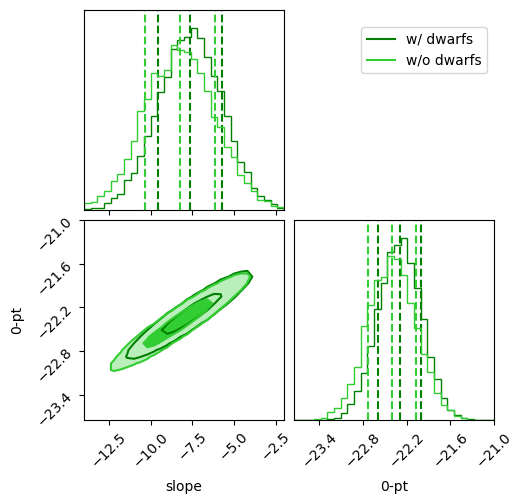

In [16]:
corner_kwargs = dict(bins=30, 
                     smooth=1,
                     range=[[-14, -2], [-23.75, -21]],   # Range for slope, 0-pt. Adjust as needed.
                     labels=['slope', '0-pt'],
                     levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                     quantiles=[0.16, 0.5, 0.84],
                     #color='blue',
                     #hist_kwargs={'histtype':'step', 'alpha':1, 'lw':2},
                     plot_datapoints=False,
                     fill_contours=True,
                     #show_titles=True,
                     title = {'Christoph'},
                     title_kwargs={"fontsize": 14})

fig = corner.corner(samples_Christoph.T, color='green', **corner_kwargs)

corner.corner(samples_Christoph_nodwarf.T, fig=fig, color='limegreen', **corner_kwargs)

plt.legend(handles=[mlines.Line2D([], [], color=c, label=l) for c,l in zip(['green', 'limegreen'],['w/ dwarfs', 'w/o dwarfs'])], 
           bbox_to_anchor=(1,2),
           loc='upper right');

### All together

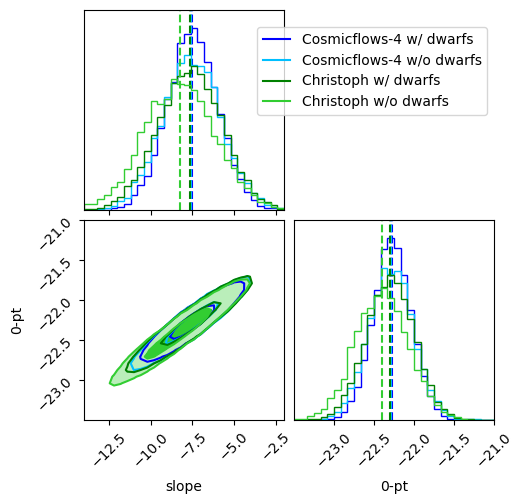

In [19]:
corner_kwargs = dict(bins=30, 
                     smooth=1,
                     range=[[-14, -2], [-23.5, -21]],   # Range for slope, 0-pt. Adjust as needed.
                     labels=['slope', '0-pt'],
                     levels=(1-np.exp(-0.5), 1-np.exp(-2)),
                     quantiles=[0.5],
                     #color='blue',
                     #hist_kwargs={'histtype':'step', 'alpha':1, 'lw':2},
                     plot_datapoints=False,
                     fill_contours=True,
                     #show_titles=True,
                     title = {'including dwarfs'},
                     title_kwargs={"fontsize": 14})

fig = corner.corner(samples_CF4.T, color='blue', **corner_kwargs)

corner.corner(samples_CF4_nodwarf.T, fig=fig, color='deepskyblue', **corner_kwargs)

corner.corner(samples_Christoph.T, fig=fig, color='green', **corner_kwargs)

corner.corner(samples_Christoph_nodwarf.T, fig=fig, color='limegreen', **corner_kwargs)

plt.legend(handles=[mlines.Line2D([], [], color=c, label=l) for c,l in zip(['blue', 'deepskyblue', 'green', 'limegreen'],['Cosmicflows-4 w/ dwarfs', 'Cosmicflows-4 w/o dwarfs', 'Christoph w/ dwarfs', 'Christoph w/o dwarfs'])], 
           bbox_to_anchor=(1,2),
           loc='upper right');